# Imports and Loading Data

In [1]:
import pandas as pd
import kaggle
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files("ruchi798/data-science-job-salaries")

In [3]:
with zipfile.ZipFile('data-science-job-salaries.zip', 'r') as zipref:
    zipref.extractall()

In [4]:
df = pd.read_csv('ds_salaries.csv')

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Exploratory Data Analysis

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
df['experience_level'] = df['experience_level'].replace(
    
    {'MI':'Mid Level', 'SE':'Senior Level', 'EN':'Entry Level', 'EX':'Executive Level'})

df['employment_type'] = df['employment_type'].replace(
    {'FT':'Full Time', 'CT':'Contract', 'PT':'Part Time', 'FL':'Freelance'})

df['company_size'] = df['company_size'].replace(
    {'L':'Large', 'S':'Small', 'M':'Medium'})

## Information on Jobs Existing in the Data

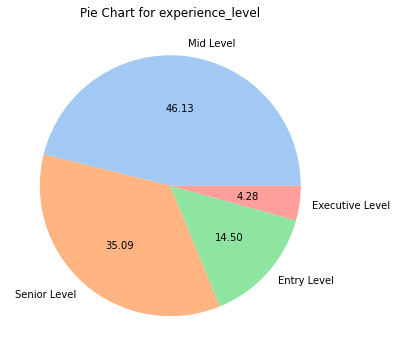

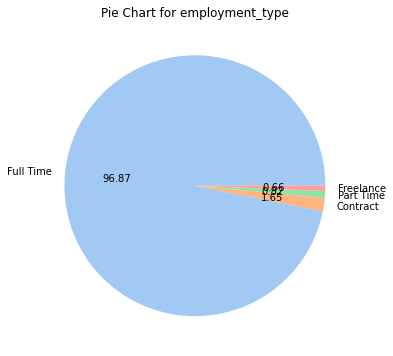

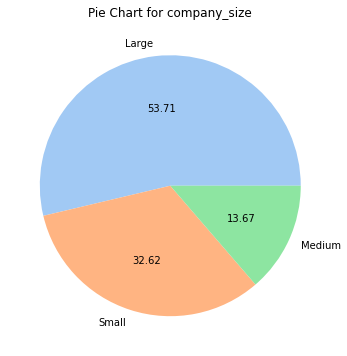

In [9]:
columns = ['experience_level', 'employment_type', 'company_size']
colors = sns.color_palette('pastel')

for c in columns:
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    plt.pie(df[c].value_counts(), labels= df[c].unique(), autopct='%.2f', colors=colors)
    ax.set_title(f'Pie Chart for {c}')

### Most jobs in this dataset are full-time, and consist of either mid to senior level roles. Also, the majority of jobs listed are from larger companies.

## Where are jobs in this dataset located?

Text(0.5, 1.0, 'Number of Jobs by Country')

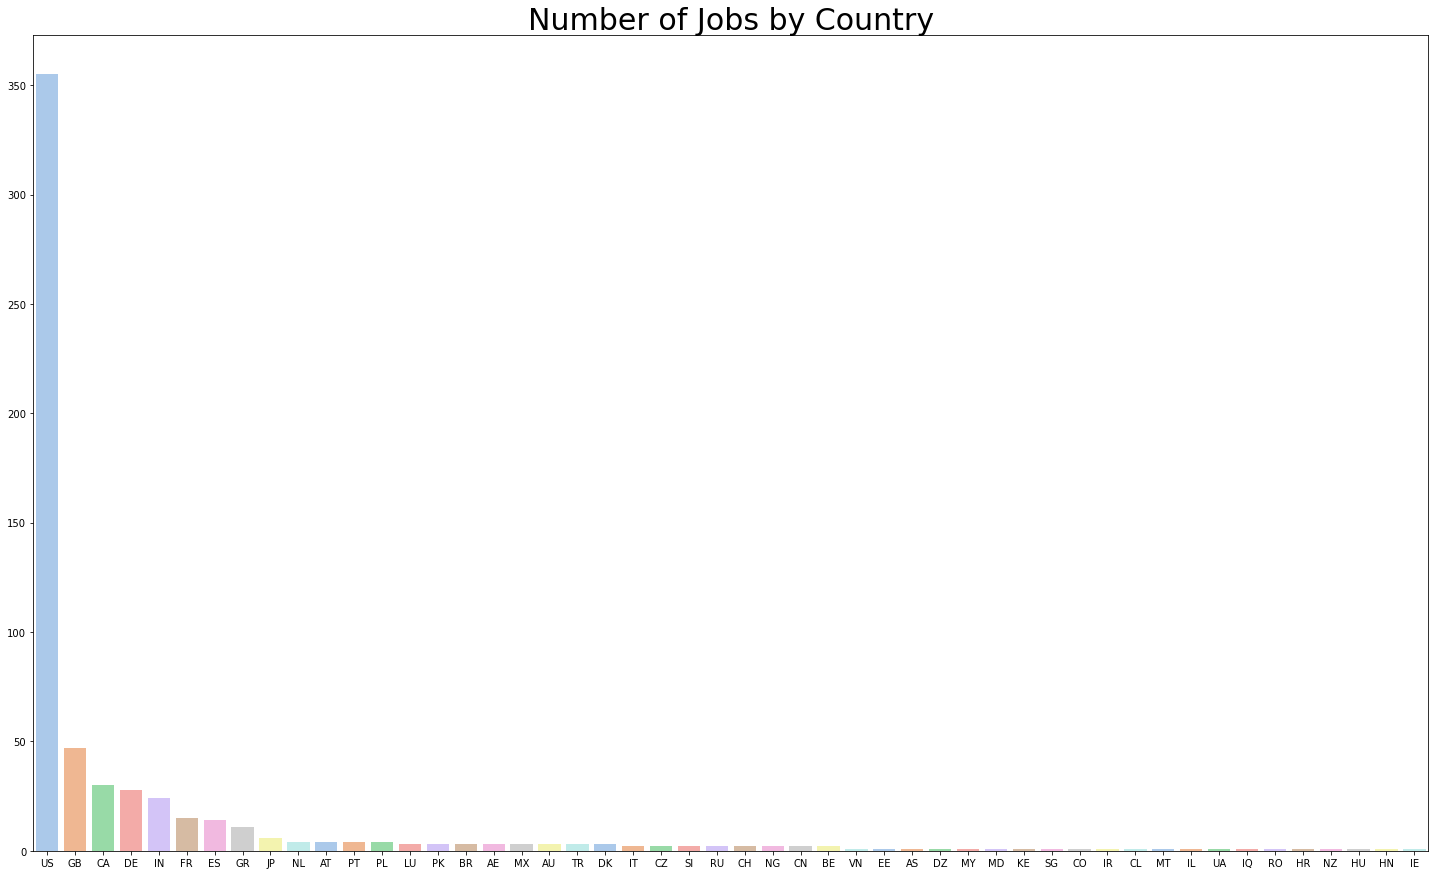

In [10]:
plt.figure(figsize=(25,15))
sns.barplot(x=df["company_location"].value_counts().index, y= df["company_location"].value_counts().values, palette='pastel')
plt.title("Number of Jobs by Country", fontsize=30)


### The large majority of jobs listed in this dataset are positions/comanies located in America, roughly 350 out of the total 607 jobs.

## What are the most common/prevelant jobs in this dataset?

Text(0.5, 1.0, 'Top 10 Jobs by Title')

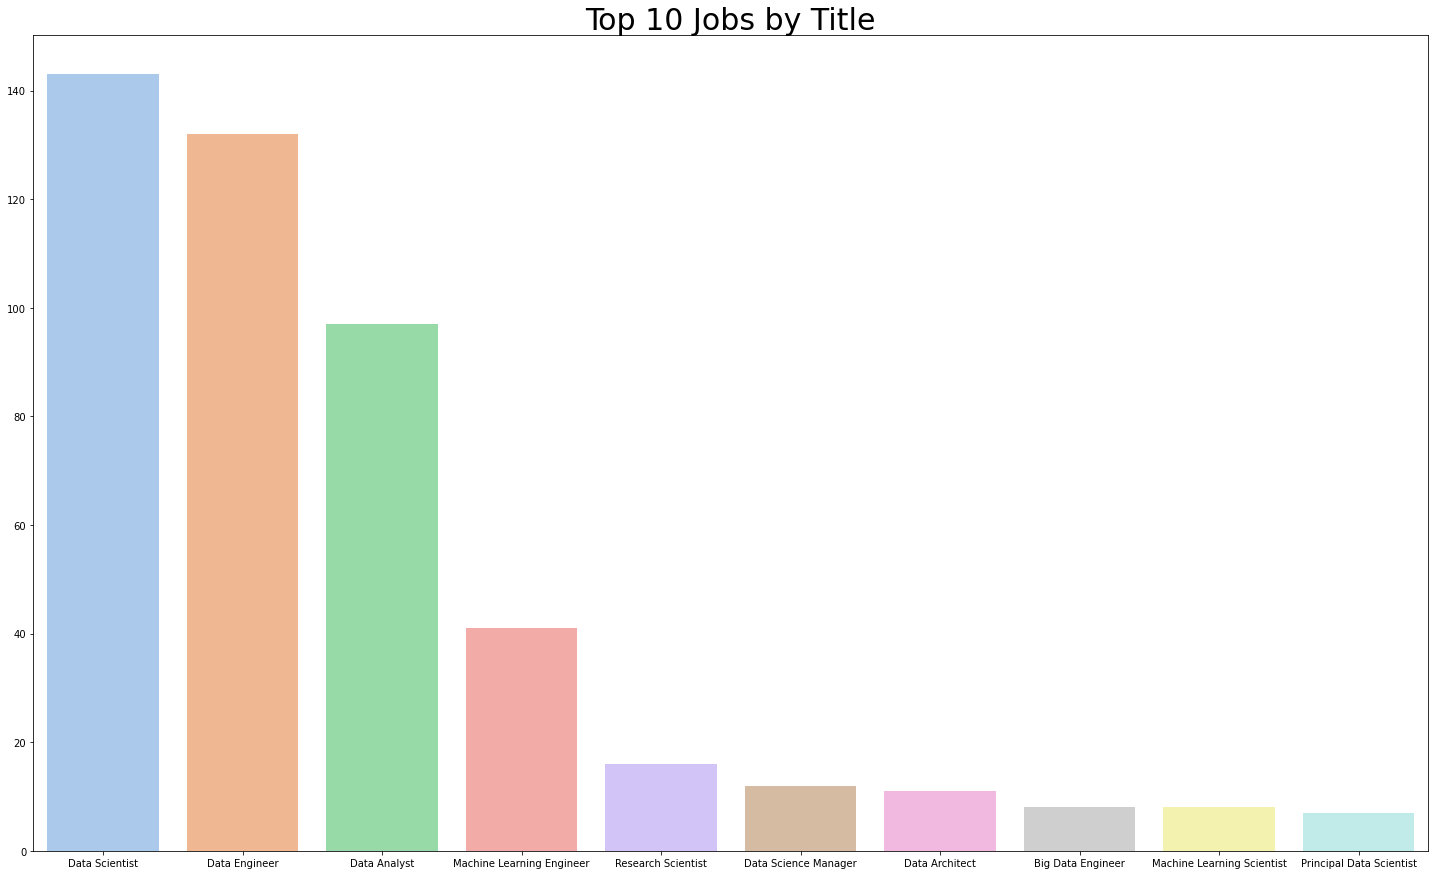

In [11]:
#top 10 jobs

n=10

plt.figure(figsize=(25,15))
sns.barplot(x=df["job_title"].value_counts().index[:n], y= df["job_title"].value_counts().values[:n], palette='pastel')
plt.title("Top 10 Jobs by Title", fontsize=30)


### Data Scientist is the most prevelant role in this dataset, making up the large majority with Data Engineer and Data Analyst

## How has remote work changed over the years, and what is it's relation to salary?

Text(0.5, 1.0, 'Number of Jobs by Remote Ratio')

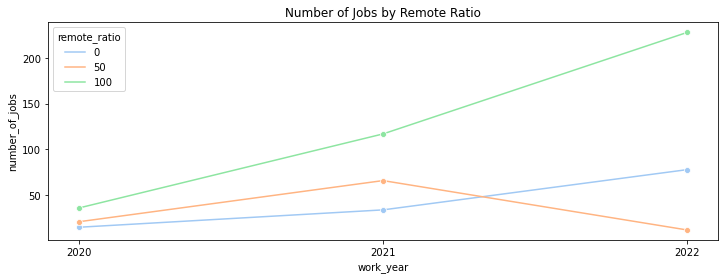

In [12]:
# Lets look at the rate of change and salary in remote jobs over the years
df_remote_yearly = df.groupby(["work_year", "remote_ratio"]).agg(average_salary_in_usd=("salary_in_usd", "mean"),
                                                                   number_of_jobs=("salary_in_usd", "count"))
df_remote_yearly = df_remote_yearly.reset_index()

plt.figure(figsize=(12,4))
g = sns.lineplot(x=df_remote_yearly["work_year"], y=df_remote_yearly['number_of_jobs'], data=df_remote_yearly, hue=df_remote_yearly['remote_ratio'], palette='pastel', marker='o')
g.set_xticks([2020,2021,2022])
g.set_title('Number of Jobs by Remote Ratio')

In [13]:
df_remote_yearly

,work_year,remote_ratio,average_salary_in_usd,number_of_jobs
0,2020,0,95210.000000,15
1,2020,50,77591.238095,21
2,2020,100,106693.611111,36
3,2021,0,91630.823529,34
4,2021,50,78750.848485,66
5,2021,100,114147.598291,117
6,2022,0,114915.884615,78
7,2022,50,97875.666667,12
8,2022,100,129210.750000,228


Text(0.5, 1.0, 'Yearly Average Salary by Remote Ratio')

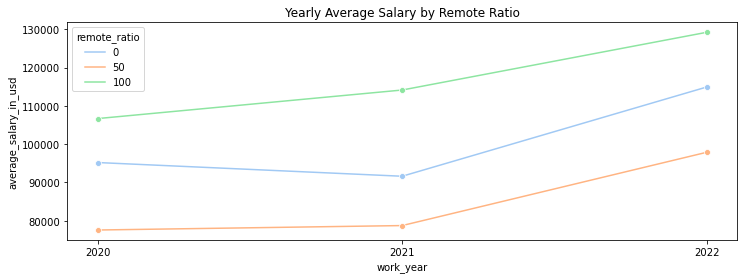

In [14]:
plt.figure(figsize=(12,4))
g2 = sns.lineplot(x=df_remote_yearly["work_year"], y=df_remote_yearly['average_salary_in_usd'], data=df_remote_yearly, hue=df_remote_yearly['remote_ratio'], palette='pastel', marker='o')
g2.set_xticks([2020,2021,2022])
g2.set_title('Yearly Average Salary by Remote Ratio')

### Over the years in this dataset, fully remote roles have seen a major increase both in terms of number of positions, as well as in terms of average salary paid to remote rolls.

## How is salary influenced by some of the other variables present in this dataset?

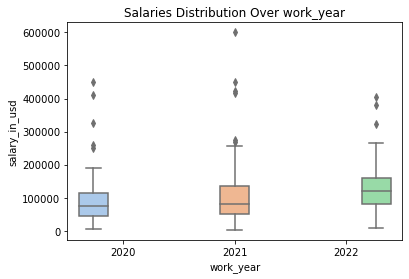

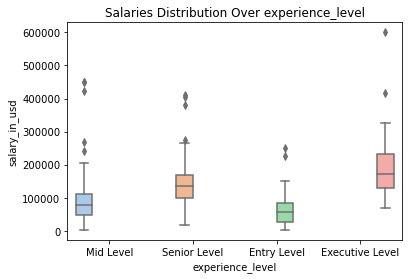

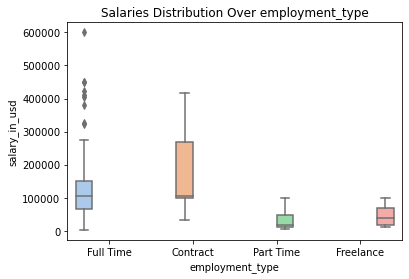

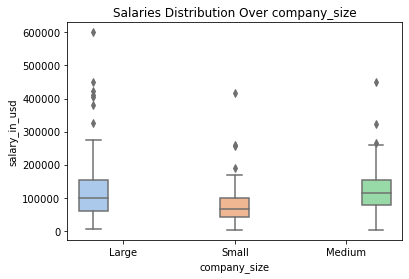

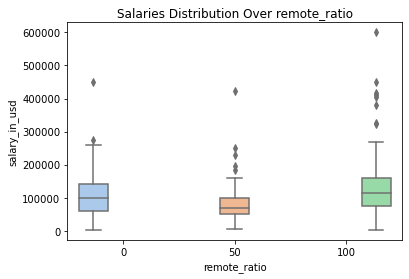

In [15]:
for col in df[["work_year", "experience_level", "employment_type", "company_size", "remote_ratio"]]:
    fig = plt.figure()


    for value in df[col].unique():
        sns.boxplot(x=df[col], y=df.loc[(df[col]==value), "salary_in_usd"], hue=df[col], palette='pastel')
        
    plt.title(f"Salaries Distribution Over {col}")
    plt.legend([],[], frameon=False)

    plt.show()

### Mean and median salaries have steadily increased over the years according to the dataset. Experience levels affect salary as one might assume. The size of the company does seem to have some influence on average salary, with smaller comppanies paying less on average and so on. Outliers when grouped based on company size shows that their may be more varaiables at play when dictating salary, this could be explored further (larger companies are not just paying more in general). The most intersting take away from this data is perhaps how salary is distributed based on employment type. Contract work seems to be the most lucrative, barring outliers in the full-time category.